In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import log
import operator

In [3]:
import random

In [4]:
np.random.seed(seed=1)

In [16]:
X_min=4
X_max=30
X_n = 16
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2]
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2]*X)+4 * np.random.randn(X_n)
np.savez('ch5_data.npz',X=X,X_min=X_min,X_max=X_max,X_n=X_n, T=T)


In [17]:
print(T)

[173.59095807 165.61093527 172.55120131 167.55677621 168.01914261
 147.66728572 170.46433696 167.63035436 166.19912729 165.56163412
 161.08399518 172.8161649  168.58729123 132.52226932 170.51211768
 160.59975669]


In [18]:
X

array([27.39715545, 15.70227975, 29.12100118, 21.58603745, 20.54239301,
        7.86864932, 28.73723147, 16.24780334, 19.45974036, 15.20342007,
       10.92567451, 27.58448801, 19.34198717,  5.07175818, 20.42862284,
       13.16612254])

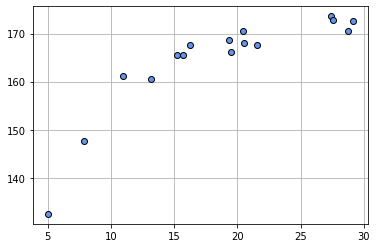

In [19]:
plt.plot(X,T,marker='o', linestyle='None',markeredgecolor='black', color='cornflowerblue')
plt.xlim=(X_min,X_max)
plt.grid(True)
plt.show()

In [27]:
np.random.rand(10)*25

array([ 9.27834752,  1.25045215, 18.52388889,  7.46700605,  5.1089532 ,
       24.54391603, 22.3255303 , 18.98371987, 16.27801397,  0.99208755])

In [30]:
def dmse_line(x,t,w):
    y = w[0]*x + w[1]
    d_w0 = 2 * np.mean((y-t)*x)
    d_w1 = 2* np.mean(y-t)
    return d_w0, d_w1

In [32]:
d_w = dmse_line(X,T,[10,165])
print(np.round(d_w,1))

[7855.7  374.1]


In [33]:
def fit_line_num(x,t):
    w_init = [10.0, 165.0]
    alpha = 0.001
    i_max = 100000
    eps = 0.1
    w_i = np.zeros([i_max,2])
    w_i[0,:] = w_init
    for i in range(1, i_max):
        dmse = dmse_line(x,t,w_i[i-1])
        w_i[i,0] = w_i[i -1, 0] - alpha * dmse[0]
        w_i[i,1] = w_i[i-1,1]- alpha * dmse[1]
        if max(np.absolute(dmse))<eps:
            break
    w0 = w_i[i,0]
    w1=w_i[i,0]
    w_i = w_i[:i,:]
    return w0, w1, dmse, w_i

In [36]:
def mse_line(x,t,w):
    y = w[0] * x + w[1]
    mse = np.mean((y-t)**2)
    return mse

반복횟수 16131
W=[1.202214, 1.202214]
dMSE=[-0.004688,0.099989]
MSE=19858.508143


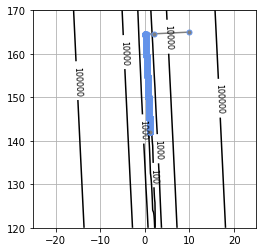

In [44]:
plt.figure(figsize=(4,4))
xn = 100
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1],xn)
x1 = np.linspace(w1_range[0], w1_range[1],xn)
xx0,xx1 = np.meshgrid(x0,x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1,i0]= mse_line(X,T,(x0[i0],x1[i1]))
cont = plt.contour(xx0, xx1, J, 30, colors='black', levels=(100,1000,10000,100000))
cont.clabel(fmt='%1.f', fontsize=8)
plt.grid(True)
W0,W1,dMSE, W_history = fit_line_num(X,T)
print('반복횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:6f}, {1:.6f}]'.format(W0,W1))
print('dMSE=[{0:.6f},{1:.6f}]'.format(dMSE[0],dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X,T,[W0,W1])))
plt.plot(W_history[:,0],W_history[:,1],'.-',color='gray',markersize=10,markeredgecolor='cornflowerblue')
plt.show()

In [45]:
49*49

2401